Dans ce projet nous souhaitons asservir en température une résistance chauffante.

Dans un premier temps,vous devrez réaliser l’asservissement numérique de la température,puis dans un second temps vous devrez exploiter vos résultats de mesure pour les comparer avec la théorie(cf vos précédent enseignement de thermique). 

Vous pourrez, entre autres:
 
•Donner l’expression de l’équation de la chaleur (plus précisément on cherche à prédire comment variera la température en fonction de la puissance de chauffe).

•Simuler cette équation dynamique (en utilisant scilab, matlab ou python à votre guise). 

•Identifier expérimentalement la valeur numérique des paramètres thermiques du système. 

•Superposer les résultats théoriques et expérimentaux. 

•Étudier l’influence de la convection forcé en ajoutant un ventilateur de PC (qui pourrait être commandé par votre système numérique)

In [1]:
%matplotlib inline


import matplotlib.pyplot as plt
import numpy as np

data = """
    Temperature: 22.55 C
    ADC Value: 735
    Voltage: 0.59 V
    Temperature: 22.69 C
    ADC Value: 742
    Voltage: 0.60 V
    Temperature: 22.78 C
    ADC Value: 759
    Voltage: 0.61 V
    Temperature: 23.01 C
    ADC Value: 773
    Voltage: 0.62 V
    Temperature: 23.21 C
    ADC Value: 790
    Voltage: 0.64 V
    Temperature: 23.44 C
    ADC Value: 811
    Voltage: 0.65 V
    Temperature: 23.73 C
    ADC Value: 835
    Voltage: 0.67 V
    Temperature: 24.06 C
    ADC Value: 860
    Voltage: 0.69 V
    Temperature: 24.41 C
    ADC Value: 889
    Voltage: 0.72 V
    Temperature: 24.81 C
    ADC Value: 917
    Voltage: 0.74 V
    Temperature: 25.20 C
    ADC Value: 951
    Voltage: 0.77 V
    Temperature: 25.67 C
    ADC Value: 987
    Voltage: 0.80 V
    Temperature: 26.18 C
    ADC Value: 1024
    Voltage: 0.83 V
    Temperature: 26.70 C
    ADC Value: 1056
    Voltage: 0.85 V
    Temperature: 27.15 C
    ADC Value: 1097
    Voltage: 0.88 V
    Temperature: 27.73 C
    ADC Value: 1136
    Voltage: 0.92 V
    Temperature: 28.29 C
    ADC Value: 1181
    Voltage: 0.95 V
    Temperature: 28.94 C
    ADC Value: 1226
    Voltage: 0.99 V
    Temperature: 29.59 C
    ADC Value: 1267
    Voltage: 1.02 V
    Temperature: 30.19 C
    ADC Value: 1314
    Voltage: 1.06 V
    Temperature: 30.88 C
    ADC Value: 1355
    Voltage: 1.09 V
    Temperature: 31.49 C
    ADC Value: 1401
    Voltage: 1.13 V
    Temperature: 32.17 C
    ADC Value: 1443
    Voltage: 1.16 V
    Temperature: 32.81 C
    ADC Value: 1484
    Voltage: 1.20 V
    Temperature: 33.43 C
    ADC Value: 1524
    Voltage: 1.23 V
    Temperature: 34.04 C
    ADC Value: 1559
    Voltage: 1.26 V
    Temperature: 34.58 C
    ADC Value: 1597
    Voltage: 1.29 V
    Temperature: 35.17 C
    ADC Value: 1635
    Voltage: 1.32 V
    Temperature: 35.77 C
    ADC Value: 1679
    Voltage: 1.35 V
    Temperature: 36.46 C
    ADC Value: 1711
    Voltage: 1.38 V
    Temperature: 36.97 C
    ADC Value: 1743
    Voltage: 1.40 V
    Temperature: 37.49 C
    ADC Value: 1779
    Voltage: 1.43 V
    Temperature: 38.07 C
    ADC Value: 1812
    Voltage: 1.46 V
    Temperature: 38.61 C
    ADC Value: 1836
    Voltage: 1.48 V
    Temperature: 39.01 C
    ADC Value: 1874
    Voltage: 1.51 V
    Temperature: 39.64 C
    ADC Value: 1899
    Voltage: 1.53 V
    Temperature: 40.06 C
    ADC Value: 1926
    Voltage: 1.55 V
    Temperature: 40.52 C
    ADC Value: 1959
    Voltage: 1.58 V
    Temperature: 41.08 C
    ADC Value: 1983
    Voltage: 1.60 V
    Temperature: 41.50 C
    ADC Value: 2013
    Voltage: 1.62 V
    Temperature: 42.02 C
    ADC Value: 2035
    Voltage: 1.64 V
    Temperature: 42.40 C
    ADC Value: 2055
    Voltage: 1.66 V
    Temperature: 42.76 C
    ADC Value: 2079
    Voltage: 1.68 V
    Temperature: 43.18 C
    ADC Value: 2103
    Voltage: 1.69 V
    Temperature: 43.61 C
    ADC Value: 2119
    Voltage: 1.71 V
    Temperature: 43.90 C
    ADC Value: 2136
    Voltage: 1.72 V
    Temperature: 44.21 C
    ADC Value: 2157
    Voltage: 1.74 V
    Temperature: 44.59 C
    ADC Value: 2165
    Voltage: 1.74 V
    Temperature: 44.74 C
    ADC Value: 2186
    Voltage: 1.76 V
    Temperature: 45.13 C
    ADC Value: 2197
    Voltage: 1.77 V
    Temperature: 45.33 C
    ADC Value: 2219
    Voltage: 1.79 V
    Temperature: 45.74 C
    ADC Value: 2236
    Voltage: 1.80 V
    Temperature: 46.06 C
    ADC Value: 2249
    Voltage: 1.81 V
    Temperature: 46.31 C
    ADC Value: 2270
    Voltage: 1.83 V
    Temperature: 46.71 C
    ADC Value: 2287
    Voltage: 1.84 V
    Temperature: 47.03 C
    ADC Value: 2302
    Voltage: 1.86 V
    Temperature: 47.32 C
    ADC Value: 2313
    Voltage: 1.86 V
    Temperature: 47.53 C
    ADC Value: 2327
    Voltage: 1.88 V
    Temperature: 47.81 C
    ADC Value: 2348
    Voltage: 1.89 V
    Temperature: 48.22 C
    ADC Value: 2359
    Voltage: 1.90 V
    Temperature: 48.44 C
    ADC Value: 2376
    Voltage: 1.91 V
    Temperature: 48.77 C
    ADC Value: 2389
    Voltage: 1.93 V
    Temperature: 49.03 C
    ADC Value: 2401
    Voltage: 1.93 V
    Temperature: 49.28 C
    ADC Value: 2415
    Voltage: 1.95 V
    Temperature: 49.56 C
    ADC Value: 2430
    Voltage: 1.96 V
    Temperature: 49.86 C
    ADC Value: 2439
    Voltage: 1.97 V
    Temperature: 50.05 C
    ADC Value: 2453
    Voltage: 1.98 V
    Temperature: 50.34 C
    ADC Value: 2464
    Voltage: 1.99 V
    Temperature: 50.56 C
    ADC Value: 2475
    Voltage: 1.99 V
    Temperature: 50.79 C
    ADC Value: 2490
    Voltage: 2.01 V
    Temperature: 51.11 C
    ADC Value: 2503
    Voltage: 2.02 V
    Temperature: 51.38 C
    ADC Value: 2513
    Voltage: 2.03 V
    Temperature: 51.59 C
    ADC Value: 2525
    Voltage: 2.03 V
    Temperature: 51.85 C
    ADC Value: 2533
    Voltage: 2.04 V
    Temperature: 52.02 C
    ADC Value: 2541
    Voltage: 2.05 V
    Temperature: 52.19 C
    ADC Value: 2551
    Voltage: 2.06 V
    Temperature: 52.41 C
    ADC Value: 2565
    Voltage: 2.07 V
    Temperature: 52.71 C
    ADC Value: 2571
    Voltage: 2.07 V
    Temperature: 52.84 C
    ADC Value: 2579
    Voltage: 2.08 V
    Temperature: 53.02 C
    ADC Value: 2593
    Voltage: 2.09 V
    Temperature: 53.33 C
    ADC Value: 2600
    Voltage: 2.10 V
    Temperature: 53.48 C
    ADC Value: 2607
    Voltage: 2.10 V
    Temperature: 53.64 C
    ADC Value: 2617
    Voltage: 2.11 V
    Temperature: 53.86 C
    ADC Value: 2629
    Voltage: 2.12 V
    Temperature: 54.13 C
    ADC Value: 2631
    Voltage: 2.12 V
    Temperature: 54.17 C
    ADC Value: 2639
    Voltage: 2.13 V
    Temperature: 54.35 C
    ADC Value: 2651
    Voltage: 2.14 V
    Temperature: 54.63 C
    ADC Value: 2657
    Voltage: 2.14 V
    Temperature: 54.76 C
    ADC Value: 2665
    Voltage: 2.15 V
    Temperature: 54.95 C
    ADC Value: 2672
    Voltage: 2.15 V
    Temperature: 55.11 C
    ADC Value: 2683
    Voltage: 2.16 V
    Temperature: 55.36 C
    ADC Value: 2689
    Voltage: 2.17 V
    Temperature: 55.50 C
    ADC Value: 2695
    Voltage: 2.17 V
    Temperature: 55.64 C
    ADC Value: 2701
    Voltage: 2.18 V
    Temperature: 55.78 C
    ADC Value: 2709
    Voltage: 2.18 V
    Temperature: 55.97 C
    ADC Value: 2710
    Voltage: 2.18 V
    Temperature: 55.99 C
    ADC Value: 2715
    Voltage: 2.19 V
    Temperature: 56.11 C
    ADC Value: 2721
    Voltage: 2.19 V
    Temperature: 56.25 C
    ADC Value: 2727
    Voltage: 2.20 V
    Temperature: 56.40 C
    ADC Value: 2731
    Voltage: 2.20 V
    Temperature: 56.49 C
    ADC Value: 2735
    Voltage: 2.20 V
    Temperature: 56.59 C
    ADC Value: 2733
    Voltage: 2.20 V
    Temperature: 56.54 C
    ADC Value: 2741
    Voltage: 2.21 V
    Temperature: 56.73 C
    ADC Value: 2743
    Voltage: 2.21 V
    Temperature: 56.78 C
    ADC Value: 2743
    Voltage: 2.21 V
    Temperature: 56.78 C
    ADC Value: 2747
    Voltage: 2.21 V
    Temperature: 56.87 C
    ADC Value: 2755
    Voltage: 2.22 V
    Temperature: 57.07 C
    ADC Value: 2755
    Voltage: 2.22 V
    Temperature: 57.07 C
    ADC Value: 2763
    Voltage: 2.23 V
    Temperature: 57.26 C
    ADC Value: 2770
    Voltage: 2.23 V
    Temperature: 57.43 C
    ADC Value: 2769
    Voltage: 2.23 V
    Temperature: 57.41 C
    ADC Value: 2778
    Voltage: 2.24 V
    Temperature: 57.63 C
    ADC Value: 2784
    Voltage: 2.24 V
    Temperature: 57.77 C
    ADC Value: 2783
    Voltage: 2.24 V
    Temperature: 57.75 C
    ADC Value: 2789
    Voltage: 2.25 V
    Temperature: 57.90 C
    ADC Value: 2797
    Voltage: 2.25 V
    Temperature: 58.10 C
    ADC Value: 2797
    Voltage: 2.25 V
    Temperature: 58.10 C
    ADC Value: 2799
    Voltage: 2.26 V
    Temperature: 58.15 C
    ADC Value: 2807
    Voltage: 2.26 V
    Temperature: 58.34 C
    ADC Value: 2813
    Voltage: 2.27 V
    Temperature: 58.49 C
    ADC Value: 2817
    Voltage: 2.27 V
    Temperature: 58.59 C
    ADC Value: 2820
    Voltage: 2.27 V
    Temperature: 58.67 C
    ADC Value: 2823
    Voltage: 2.27 V
    Temperature: 58.75 C
    ADC Value: 2827
    Voltage: 2.28 V
    Temperature: 58.85 C
    ADC Value: 2827
    Voltage: 2.28 V
    Temperature: 58.85 C
    ADC Value: 2833
    Voltage: 2.28 V
    Temperature: 59.00 C
    ADC Value: 2842
    Voltage: 2.29 V
    Temperature: 59.23 C
    ADC Value: 2845
    Voltage: 2.29 V
    Temperature: 59.30 C
    ADC Value: 2843
    Voltage: 2.29 V
    Temperature: 59.25 C
    ADC Value: 2852
    Voltage: 2.30 V
    Temperature: 59.48 C
    ADC Value: 2853
    Voltage: 2.30 V
    Temperature: 59.51 C
    ADC Value: 2858
    Voltage: 2.30 V
    Temperature: 59.64 C
    ADC Value: 2859
    Voltage: 2.30 V
    Temperature: 59.66 C
    ADC Value: 2865
    Voltage: 2.31 V
    Temperature: 59.82 C
    ADC Value: 2869
    Voltage: 2.31 V
    Temperature: 59.92 C
    ADC Value: 2871
    Voltage: 2.31 V
    Temperature: 59.98 C
    ADC Value: 2877
    Voltage: 2.32 V
    Temperature: 60.13 C
    ADC Value: 2879
    Voltage: 2.32 V
    Temperature: 60.18 C
    ADC Value: 2881
    Voltage: 2.32 V
    Temperature: 60.24 C
    ADC Value: 2879
    Voltage: 2.32 V
    Temperature: 60.18 C
    ADC Value: 2883
    Voltage: 2.32 V
    Temperature: 60.29 C
    ADC Value: 2889
    Voltage: 2.33 V
    Temperature: 60.45 C
    ADC Value: 2891
    Voltage: 2.33 V
    Temperature: 60.50 C
    ADC Value: 2893
    Voltage: 2.33 V
    Temperature: 60.55 C
    ADC Value: 2894
    Voltage: 2.33 V
    Temperature: 60.58 C
    ADC Value: 2901
    Voltage: 2.34 V
    Temperature: 60.76 C
    ADC Value: 2900
    Voltage: 2.34 V
    Temperature: 60.74 C
    ADC Value: 2905
    Voltage: 2.34 V
    Temperature: 60.87 C
    ADC Value: 2908
    Voltage: 2.34 V
    Temperature: 60.95 C
    ADC Value: 2913
    Voltage: 2.35 V
    Temperature: 61.08 C
    ADC Value: 2915
    Voltage: 2.35 V
    Temperature: 61.14 C
    ADC Value: 2913
    Voltage: 2.35 V
    Temperature: 61.08 C
    ADC Value: 2919
    Voltage: 2.35 V
    Temperature: 61.25 C
    ADC Value: 2923
    Voltage: 2.36 V
    Temperature: 61.35 C
    ADC Value: 2923
    Voltage: 2.36 V
    Temperature: 61.35 C
    ADC Value: 2919
    Voltage: 2.35 V
    Temperature: 61.25 C
    ADC Value: 2923
    Voltage: 2.36 V
    Temperature: 61.35 C
    ADC Value: 2929
    Voltage: 2.36 V
    Temperature: 61.52 C
    ADC Value: 2929
    Voltage: 2.36 V
    Temperature: 61.52 C
    ADC Value: 2931
    Voltage: 2.36 V
    Temperature: 61.57 C
    ADC Value: 2935
    Voltage: 2.37 V
    Temperature: 61.68 C
    ADC Value: 2933
    Voltage: 2.36 V
    Temperature: 61.62 C
    ADC Value: 2940
    Voltage: 2.37 V
    Temperature: 61.82 C
    ADC Value: 2938
    Voltage: 2.37 V
    Temperature: 61.76 C
    ADC Value: 2943
    Voltage: 2.37 V
    Temperature: 61.90 C
    ADC Value: 2943
    Voltage: 2.37 V
    Temperature: 61.90 C
    ADC Value: 2949
    Voltage: 2.38 V
    Temperature: 62.06 C
    ADC Value: 2945
    Voltage: 2.37 V
    Temperature: 61.95 C
    ADC Value: 2947
    Voltage: 2.37 V
    Temperature: 62.01 C
    ADC Value: 2947
    Voltage: 2.37 V
    Temperature: 62.01 C
    ADC Value: 2951
    Voltage: 2.38 V
    Temperature: 62.12 C
    ADC Value: 2951
    Voltage: 2.38 V
    Temperature: 62.12 C
    ADC Value: 2951
    Voltage: 2.38 V
    Temperature: 62.12 C
    ADC Value: 2953
    Voltage: 2.38 V
    Temperature: 62.17 C
    ADC Value: 2957
    Voltage: 2.38 V
    Temperature: 62.28 C
    ADC Value: 2957
    Voltage: 2.38 V
    Temperature: 62.28 C
    ADC Value: 2955
    Voltage: 2.38 V
    Temperature: 62.23 C
    ADC Value: 2955
    Voltage: 2.38 V
    Temperature: 62.23 C
    ADC Value: 2957
    Voltage: 2.38 V
    Temperature: 62.28 C
    ADC Value: 2961
    Voltage: 2.39 V
    Temperature: 62.39 C
    ADC Value: 2963
    Voltage: 2.39 V
    Temperature: 62.45 C
    ADC Value: 2961
    Voltage: 2.39 V
    Temperature: 62.39 C
    ADC Value: 2963
    Voltage: 2.39 V
    Temperature: 62.45 C
    ADC Value: 2965
    Voltage: 2.39 V
    Temperature: 62.50 C
    ADC Value: 2964
    Voltage: 2.39 V
    Temperature: 62.48 C
    ADC Value: 2969
    Voltage: 2.39 V
    Temperature: 62.62 C
    ADC Value: 2971
    Voltage: 2.39 V
    Temperature: 62.67 C
    ADC Value: 2967
    Voltage: 2.39 V
    Temperature: 62.56 C
    ADC Value: 2973
    Voltage: 2.40 V
    Temperature: 62.73 C
    ADC Value: 2974
    Voltage: 2.40 V
    Temperature: 62.76 C
    ADC Value: 2974
    Voltage: 2.40 V
    Temperature: 62.76 C
    ADC Value: 2979
    Voltage: 2.40 V
    Temperature: 62.90 C
    ADC Value: 2975
    Voltage: 2.40 V
    Temperature: 62.78 C
    ADC Value: 2977
    Voltage: 2.40 V
    Temperature: 62.84 C
    ADC Value: 2981
    Voltage: 2.40 V
    Temperature: 62.95 C
    ADC Value: 2983
    Voltage: 2.40 V
    Temperature: 63.01 C
    ADC Value: 2973
    Voltage: 2.40 V
    Temperature: 62.73 C
    ADC Value: 2975
    Voltage: 2.40 V
    Temperature: 62.78 C
    ADC Value: 2975
    Voltage: 2.40 V
    Temperature: 62.78 C
    ADC Value: 2975
    Voltage: 2.40 V
    Temperature: 62.78 C
    ADC Value: 2967
    Voltage: 2.39 V
    Temperature: 62.56 C
    ADC Value: 2966
    Voltage: 2.39 V
    Temperature: 62.53 C
    ADC Value: 2965
    Voltage: 2.39 V
    Temperature: 62.50 C
    ADC Value: 2963
    Voltage: 2.39 V
    Temperature: 62.45 C
    ADC Value: 2967
    Voltage: 2.39 V
    Temperature: 62.56 C
    ADC Value: 2961
    Voltage: 2.39 V
    Temperature: 62.39 C
    ADC Value: 2967
    Voltage: 2.39 V
    Temperature: 62.56 C
    ADC Value: 2963
    Voltage: 2.39 V
    Temperature: 62.45 C
    ADC Value: 2967
    Voltage: 2.39 V
    Temperature: 62.56 C
    ADC Value: 2968
    Voltage: 2.39 V
    Temperature: 62.59 C
    ADC Value: 2961
    Voltage: 2.39 V
    Temperature: 62.39 C
    ADC Value: 2963
    Voltage: 2.39 V
    Temperature: 62.45 C
    ADC Value: 2967
    Voltage: 2.39 V
    Temperature: 62.56 C
    ADC Value: 2967
    Voltage: 2.39 V
    Temperature: 62.56 C
    ADC Value: 2967
    Voltage: 2.39 V
    Temperature: 62.56 C
    ADC Value: 2970
    Voltage: 2.39 V
    Temperature: 62.64 C
    ADC Value: 2973
    Voltage: 2.40 V
    Temperature: 62.73 C
    ADC Value: 2967
    Voltage: 2.39 V
    Temperature: 62.56 C
    ADC Value: 2969
    Voltage: 2.39 V
    Temperature: 62.62 C
    ADC Value: 2975
    Voltage: 2.40 V
    Temperature: 62.78 C
    ADC Value: 2977
    Voltage: 2.40 V
    Temperature: 62.84 C
    ADC Value: 2977
    Voltage: 2.40 V
    Temperature: 62.84 C
    ADC Value: 2979
    Voltage: 2.40 V
    Temperature: 62.90 C
    ADC Value: 2977
    Voltage: 2.40 V
    Temperature: 62.84 C
    ADC Value: 2975
    Voltage: 2.40 V
    Temperature: 62.78 C
    ADC Value: 2979
    Voltage: 2.40 V
    Temperature: 62.90 C
    ADC Value: 2979
    Voltage: 2.40 V
    Temperature: 62.90 C
    ADC Value: 2981
    Voltage: 2.40 V
    Temperature: 62.95 C
    ADC Value: 2981
    Voltage: 2.40 V
    Temperature: 62.95 C
    ADC Value: 2983
    Voltage: 2.40 V
    Temperature: 63.01 C
    ADC Value: 2985
    Voltage: 2.41 V
    Temperature: 63.07 C
    ADC Value: 2981
    Voltage: 2.40 V
    Temperature: 62.95 C
    ADC Value: 2990
    Voltage: 2.41 V
    Temperature: 63.21 C
    ADC Value: 2986
    Voltage: 2.41 V
    Temperature: 63.09 C
    ADC Value: 2987
    Voltage: 2.41 V
    Temperature: 63.12 C
    ADC Value: 2993
    Voltage: 2.41 V
    Temperature: 63.29 C
    ADC Value: 2987
    Voltage: 2.41 V
    Temperature: 63.12 C
    ADC Value: 2987
    Voltage: 2.41 V
    Temperature: 63.12 C
    ADC Value: 2985
    Voltage: 2.41 V
    Temperature: 63.07 C
    ADC Value: 2981
    Voltage: 2.40 V
    Temperature: 62.95 C
    ADC Value: 2983
    Voltage: 2.40 V
    Temperature: 63.01 C
    ADC Value: 2976
    Voltage: 2.40 V
    Temperature: 62.81 C
    ADC Value: 2975
    Voltage: 2.40 V
    Temperature: 62.78 C
    ADC Value: 2975
    Voltage: 2.40 V
    Temperature: 62.78 C
    ADC Value: 2975
    Voltage: 2.40 V
    Temperature: 62.78 C
    ADC Value: 2969
    Voltage: 2.39 V
    Temperature: 62.62 C
    ADC Value: 2973
    Voltage: 2.40 V
    Temperature: 62.73 C
    ADC Value: 2973
    Voltage: 2.40 V
    Temperature: 62.73 C
    ADC Value: 2971
    Voltage: 2.39 V
    Temperature: 62.67 C
    ADC Value: 2973
    Voltage: 2.40 V
    Temperature: 62.73 C
    ADC Value: 2973
    Voltage: 2.40 V
    Temperature: 62.73 C
    ADC Value: 2973
    Voltage: 2.40 V
    Temperature: 62.73 C
    ADC Value: 2973
    Voltage: 2.40 V
    Temperature: 62.73 C
    ADC Value: 2975
    Voltage: 2.40 V
    Temperature: 62.78 C
    ADC Value: 2975
    Voltage: 2.40 V
    Temperature: 62.78 C
    ADC Value: 2979
    Voltage: 2.40 V
    Temperature: 62.90 C
    ADC Value: 2975
    Voltage: 2.40 V
    Temperature: 62.78 C
    ADC Value: 2975
    Voltage: 2.40 V
    Temperature: 62.78 C
    ADC Value: 2979
    Voltage: 2.40 V
    Temperature: 62.90 C
    ADC Value: 2975
    Voltage: 2.40 V
    Temperature: 62.78 C
    ADC Value: 2981
    Voltage: 2.40 V
    Temperature: 62.95 C
    ADC Value: 2979
    Voltage: 2.40 V
    Temperature: 62.90 C
    ADC Value: 2979
    Voltage: 2.40 V
    Temperature: 62.90 C
    ADC Value: 2983
    Voltage: 2.40 V
    Temperature: 63.01 C
    ADC Value: 2985
    Voltage: 2.41 V
    Temperature: 63.07 C
    ADC Value: 2986
    Voltage: 2.41 V
    Temperature: 63.09 C
    ADC Value: 2987
    Voltage: 2.41 V
    Temperature: 63.12 C
    ADC Value: 2983
    Voltage: 2.40 V
    Temperature: 63.01 C
    ADC Value: 2987
    Voltage: 2.41 V
    Temperature: 63.12 C
    ADC Value: 2987
    Voltage: 2.41 V
    Temperature: 63.12 C
    ADC Value: 2985
    Voltage: 2.41 V
    Temperature: 63.07 C
    ADC Value: 2987
    Voltage: 2.41 V
    Temperature: 63.12 C
    ADC Value: 2987
    Voltage: 2.41 V
    Temperature: 63.12 C
    ADC Value: 2989
    Voltage: 2.41 V
    Temperature: 63.18 C
    ADC Value: 2989
    Voltage: 2.41 V
    Temperature: 63.18 C
    ADC Value: 2992
    Voltage: 2.41 V
    Temperature: 63.26 C
    ADC Value: 2987
    Voltage: 2.41 V
    Temperature: 63.12 C
    ADC Value: 2989
    Voltage: 2.41 V
    Temperature: 63.18 C
    ADC Value: 2989
    Voltage: 2.41 V
    Temperature: 63.18 C
    ADC Value: 2995
    Voltage: 2.41 V
    Temperature: 63.35 C
    ADC Value: 2995
    Voltage: 2.41 V
    Temperature: 63.35 C
    ADC Value: 2995
    Voltage: 2.41 V
    Temperature: 63.35 C
    ADC Value: 2997
    Voltage: 2.42 V
    Temperature: 63.41 C
    ADC Value: 2997
    Voltage: 2.42 V
    Temperature: 63.41 C
    ADC Value: 2995
    Voltage: 2.41 V
    Temperature: 63.35 C
    ADC Value: 2997
    Voltage: 2.42 V
    Temperature: 63.41 C
    ADC Value: 3001
    Voltage: 2.42 V
    Temperature: 63.52 C
    ADC Value: 2999
    Voltage: 2.42 V
    Temperature: 63.46 C
    ADC Value: 3003
    Voltage: 2.42 V
    Temperature: 63.58 C
    ADC Value: 3002
    Voltage: 2.42 V
    Temperature: 63.55 C
    ADC Value: 3002
    Voltage: 2.42 V
    Temperature: 63.55 C
    ADC Value: 3005
    Voltage: 2.42 V
    Temperature: 63.63 C
    ADC Value: 3003
    Voltage: 2.42 V
    Temperature: 63.58 C
    ADC Value: 3005
    Voltage: 2.42 V
    Temperature: 63.63 C
    ADC Value: 3005
    Voltage: 2.42 V
    Temperature: 63.63 C
    ADC Value: 3005
    Voltage: 2.42 V
    Temperature: 63.63 C
    ADC Value: 3007
    Voltage: 2.42 V
    Temperature: 63.69 C
    ADC Value: 3005
    Voltage: 2.42 V
    Temperature: 63.63 C
    ADC Value: 3003
    Voltage: 2.42 V
    Temperature: 63.58 C
    ADC Value: 3003
    Voltage: 2.42 V
    Temperature: 63.58 C
    ADC Value: 3009
    Voltage: 2.42 V
    Temperature: 63.75 C
    ADC Value: 3009
    Voltage: 2.42 V
    Temperature: 63.75 C
    ADC Value: 3005
    Voltage: 2.42 V
    Temperature: 63.63 C
    ADC Value: 3007
    Voltage: 2.42 V
    Temperature: 63.69 C
    ADC Value: 3011
    Voltage: 2.43 V
    Temperature: 63.81 C
    ADC Value: 3011
    Voltage: 2.43 V
    Temperature: 63.81 C
    ADC Value: 3013
    Voltage: 2.43 V
    Temperature: 63.86 C
    ADC Value: 3013
    Voltage: 2.43 V
    Temperature: 63.86 C
    ADC Value: 3009
    Voltage: 2.42 V
    Temperature: 63.75 C
    ADC Value: 3013
    Voltage: 2.43 V
    Temperature: 63.86 C
    ADC Value: 3015
    Voltage: 2.43 V
    Temperature: 63.92 C
    ADC Value: 3014
    Voltage: 2.43 V
    Temperature: 63.89 C
    ADC Value: 3015
    Voltage: 2.43 V
    Temperature: 63.92 C
    ADC Value: 3011
    Voltage: 2.43 V
    Temperature: 63.81 C
    ADC Value: 3015
    Voltage: 2.43 V
    Temperature: 63.92 C
    ADC Value: 3013
    Voltage: 2.43 V
    Temperature: 63.86 C
    ADC Value: 3013
    Voltage: 2.43 V
    Temperature: 63.86 C
    ADC Value: 3013
    Voltage: 2.43 V
    Temperature: 63.86 C
    ADC Value: 3018
    Voltage: 2.43 V
    Temperature: 64.01 C
    ADC Value: 3017
    Voltage: 2.43 V
    Temperature: 63.98 C
    ADC Value: 3019
    Voltage: 2.43 V
    Temperature: 64.04 C
    ADC Value: 3017
    Voltage: 2.43 V
    Temperature: 63.98 C
    ADC Value: 3021
    Voltage: 2.43 V
    Temperature: 64.10 C
    ADC Value: 3021
    Voltage: 2.43 V
    Temperature: 64.10 C
    ADC Value: 3019
    Voltage: 2.43 V
    Temperature: 64.04 C
    ADC Value: 3019
    Voltage: 2.43 V
    Temperature: 64.04 C
    ADC Value: 3023
    Voltage: 2.44 V
    Temperature: 64.15 C
    ADC Value: 3023
    Voltage: 2.44 V
    Temperature: 64.15 C
    ADC Value: 3022
    Voltage: 2.44 V
    Temperature: 64.13 C
    ADC Value: 3029
    Voltage: 2.44 V
    Temperature: 64.33 C
    ADC Value: 3022
    Voltage: 2.44 V
    Temperature: 64.13 C
    ADC Value: 3023
    Voltage: 2.44 V
    Temperature: 64.15 C
    ADC Value: 3021
    Voltage: 2.43 V
    Temperature: 64.10 C
    ADC Value: 3023
    Voltage: 2.44 V
    Temperature: 64.15 C
    ADC Value: 3025
    Voltage: 2.44 V
    Temperature: 64.21 C
    ADC Value: 3025
    Voltage: 2.44 V
    Temperature: 64.21 C
    ADC Value: 3023
    Voltage: 2.44 V
    Temperature: 64.15 C
    ADC Value: 3027
    Voltage: 2.44 V
    Temperature: 64.27 C
    ADC Value: 3027
    Voltage: 2.44 V
    Temperature: 64.27 C
    ADC Value: 3028
    Voltage: 2.44 V
    Temperature: 64.30 C
    ADC Value: 3023
    Voltage: 2.44 V
    Temperature: 64.15 C
    ADC Value: 3023
    Voltage: 2.44 V
    Temperature: 64.15 C
    ADC Value: 3030
    Voltage: 2.44 V
    Temperature: 64.36 C
    ADC Value: 3025
    Voltage: 2.44 V
    Temperature: 64.21 C
    ADC Value: 3029
    Voltage: 2.44 V
    Temperature: 64.33 C
    ADC Value: 3031
    Voltage: 2.44 V
    Temperature: 64.39 C
    ADC Value: 3029
    Voltage: 2.44 V
    Temperature: 64.33 C
    ADC Value: 3029
    Voltage: 2.44 V
    Temperature: 64.33 C
    ADC Value: 3029
    Voltage: 2.44 V
    Temperature: 64.33 C
    ADC Value: 3031
    Voltage: 2.44 V
    Temperature: 64.39 C
    ADC Value: 3030
    Voltage: 2.44 V
    Temperature: 64.36 C
    ADC Value: 3033
    Voltage: 2.44 V
    Temperature: 64.45 C
    ADC Value: 3029
    Voltage: 2.44 V
    Temperature: 64.33 C
    ADC Value: 3027
    Voltage: 2.44 V
    Temperature: 64.27 C
    ADC Value: 3027
    Voltage: 2.44 V
    Temperature: 64.27 C
    ADC Value: 3023
    Voltage: 2.44 V
    Temperature: 64.15 C
    ADC Value: 3019
    Voltage: 2.43 V
    Temperature: 64.04 C
    ADC Value: 3013
    Voltage: 2.43 V
    Temperature: 63.86 C
    ADC Value: 3009
    Voltage: 2.42 V
    Temperature: 63.75 C
    ADC Value: 3009
    Voltage: 2.42 V
    Temperature: 63.75 C
    ADC Value: 3003
    Voltage: 2.42 V
    Temperature: 63.58 C
    ADC Value: 3001
    Voltage: 2.42 V
    Temperature: 63.52 C
    ADC Value: 3001
    Voltage: 2.42 V
    Temperature: 63.52 C
    ADC Value: 2997
    Voltage: 2.42 V
    Temperature: 63.41 C
    ADC Value: 2995
    Voltage: 2.41 V
    Temperature: 63.35 C
    ADC Value: 2993
    Voltage: 2.41 V
    Temperature: 63.29 C
    ADC Value: 2987
    Voltage: 2.41 V
    Temperature: 63.12 C
    ADC Value: 2989
    Voltage: 2.41 V
    Temperature: 63.18 C
    ADC Value: 2987
    Voltage: 2.41 V
    Temperature: 63.12 C
    ADC Value: 2983
    Voltage: 2.40 V
    Temperature: 63.01 C
    ADC Value: 2986
    Voltage: 2.41 V
    Temperature: 63.09 C
    ADC Value: 2985
    Voltage: 2.41 V
    Temperature: 63.07 C
    ADC Value: 2983
    Voltage: 2.40 V
    Temperature: 63.01 C
    ADC Value: 2985
    Voltage: 2.41 V
    Temperature: 63.07 C
    ADC Value: 2983
    Voltage: 2.40 V
    Temperature: 63.01 C
    ADC Value: 2986
    Voltage: 2.41 V
    Temperature: 63.09 C
    ADC Value: 2983
    Voltage: 2.40 V
    Temperature: 63.01 C
    ADC Value: 2979
    Voltage: 2.40 V
    Temperature: 62.90 C
    ADC Value: 2979
    Voltage: 2.40 V
    Temperature: 62.90 C
    ADC Value: 2977
    Voltage: 2.40 V
    Temperature: 62.84 C
    ADC Value: 2967
    Voltage: 2.39 V
    Temperature: 62.56 C
    ADC Value: 2963
    Voltage: 2.39 V
    Temperature: 62.45 C
    ADC Value: 2967
    """

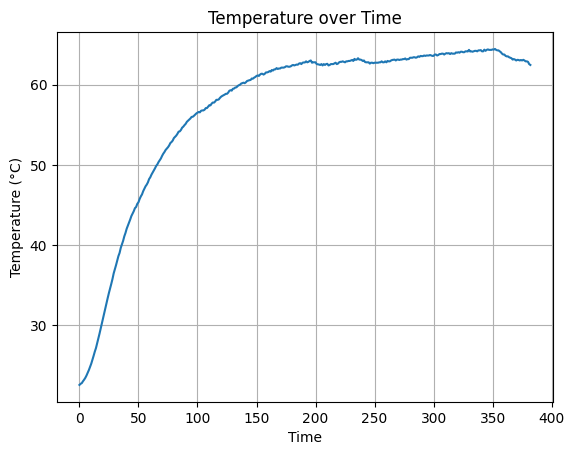

In [2]:
#Mesure 1

import matplotlib.pyplot as plt
import numpy as np


# Split the data into lines and strip leading spaces
lines = [line.strip() for line in data.split('\n')]

# Extract the temperature values and convert them to floats
temperatures = [float(line.split()[1]) for line in lines if line.startswith('Temperature')]

# Create a time array assuming that each measurement was taken at equal intervals
time = np.arange(len(temperatures))

# Plot the temperature over time
plt.plot(time, temperatures)
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature over Time')
plt.grid(True)
plt.show()

•Donner l’expression de l’équation de la chaleur 

•Simuler cette équation dynamique 

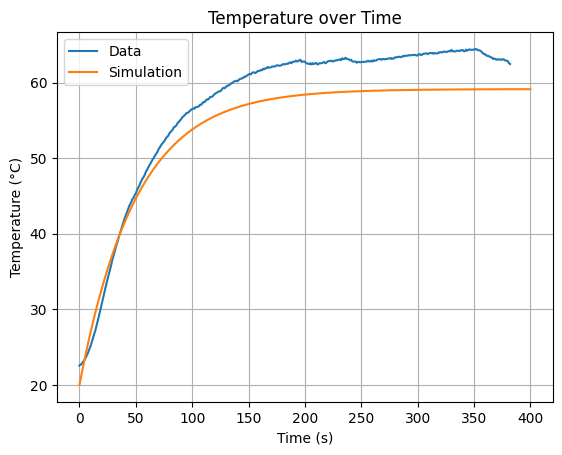

In [3]:
#Superposition de l'expérience et de la simulation 

import numpy as np
import matplotlib.pyplot as plt

lines = [line.strip() for line in data.split('\n')]
temperatures = [float(line.split()[1]) for line in lines if line.startswith('Temperature')]
time_data = np.arange(len(temperatures))

# Run the simulation
k = 185
rho = 1700
C_plaque = 700
h = 35
A = (4e-3*60e-3)+(4e-3*35e-3)+(70e-3*60e-3)+(4e-3*60e-3)+(4e-3*20e-3)+(40e-3*60e-3)
V = ((60e-3 * 35e-3 * 2e-3)+(60e-3 * 20e-3 * 4e-3)+(60e-3 * 15e-3 * 2e-3))
T_air = 20
P = 10
delta_t = 0.1
simulation_time = int(400)
num_iterations = int(simulation_time / delta_t)

T = np.zeros(num_iterations)
T[0] = 20

for i in range(num_iterations - 1):
    delta = (P - A * h * (T[i] - T_air)) * delta_t / (rho * C_plaque * V)
    T[i + 1] = T[i] + delta

time_simulation = np.linspace(0, simulation_time, num_iterations)

# Plot the temperature data and the simulation results
plt.plot(time_data, temperatures, label='Data')
plt.plot(time_simulation, T, label='Simulation')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature over Time')
plt.grid(True)
plt.legend()
plt.show()

#print(A, V)

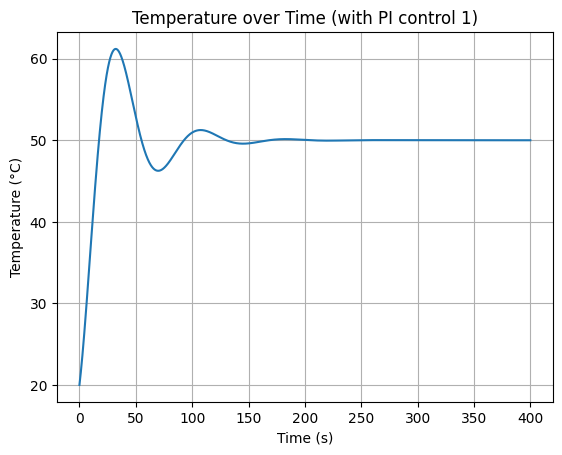

In [4]:
#PI attempt 1

import numpy as np
import matplotlib.pyplot as plt

# Define the PI controller parameters
Kp = 0.5
Ki = 0.1

# Define the setpoint temperature
setpoint = 50

# Define the initial temperature and error
T0 = 20
error0 = setpoint - T0

# Define the time step and simulation time
delta_t = 0.1
simulation_time = 400

# Define the system parameters
k = 185
rho = 1700
C_plaque = 700
h = 35
A = (4e-3*60e-3)+(4e-3*35e-3)+(70e-3*60e-3)+(4e-3*60e-3)+(4e-3*20e-3)+(40e-3*60e-3)
V = ((60e-3 * 35e-3 * 2e-3)+(60e-3 * 20e-3 * 4e-3)+(60e-3 * 15e-3 * 2e-3))
T_air = 20
P = 10

# Initialize the simulation variables
num_iterations = int(simulation_time / delta_t)
T = np.zeros(num_iterations)
T[0] = T0
error = np.zeros(num_iterations)
error[0] = error0
integral = 0

# Run the simulation with PI control
for i in range(num_iterations - 1):
    # Compute the error and update the integral term
    error[i + 1] = setpoint - T[i]
    integral += error[i] * delta_t
    
    # Compute the control signal using the PI formula
    control_signal = Kp * error[i + 1] + Ki * integral
    
    # Compute the temperature change using the heat equation
    delta = (control_signal - A * h * (T[i] - T_air)) * delta_t / (rho * C_plaque * V)
    T[i + 1] = T[i] + delta

# Plot the temperature data and the simulation results
time_simulation = np.linspace(0, simulation_time, num_iterations)
plt.plot(time_simulation, T, label='Simulation')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature over Time (with PI control 1)')
plt.grid(True)
plt.show()

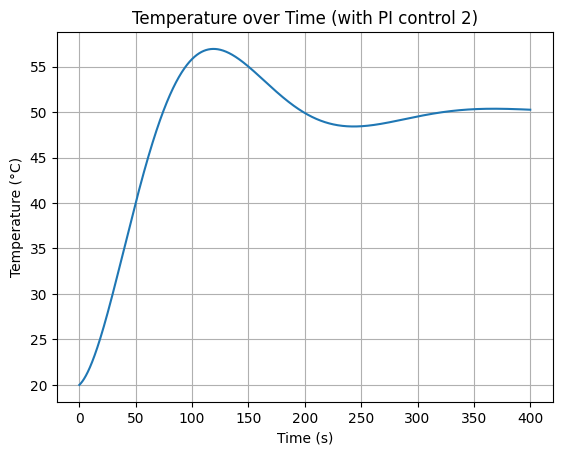

In [5]:
#PI attempt 2

import numpy as np
import matplotlib.pyplot as plt

# Define the PI controller parameters
Kp = 0.05  # Reduced from 0.5
Ki = 0.01  # Reduced from 0.1

# Define the setpoint temperature
setpoint = 50

# Define the initial temperature and error
T0 = 20
error0 = setpoint - T0

# Define the time step and simulation time
delta_t = 0.1
simulation_time = 400

# Define the system parameters
k = 185
rho = 1700
C_plaque = 700
h = 35
A = (4e-3*60e-3)+(4e-3*35e-3)+(70e-3*60e-3)+(4e-3*60e-3)+(4e-3*20e-3)+(40e-3*60e-3)
V = ((60e-3 * 35e-3 * 2e-3)+(60e-3 * 20e-3 * 4e-3)+(60e-3 * 15e-3 * 2e-3))
T_air = 20
P = 10

# Initialize the simulation variables
num_iterations = int(simulation_time / delta_t)
T = np.zeros(num_iterations)
T[0] = T0
error = np.zeros(num_iterations)
error[0] = error0
integral = 0

# Run the simulation with PI control
for i in range(num_iterations - 1):
    # Compute the error and update the integral term
    error[i + 1] = setpoint - T[i]
    integral += error[i] * delta_t
    
    # Compute the control signal using the PI formula
    control_signal = Kp * error[i + 1] + Ki * integral
    
    # Compute the temperature change using the heat equation
    delta = (control_signal - A * h * (T[i] - T_air)) * delta_t / (rho * C_plaque * V)
    T[i + 1] = T[i] + delta

# Plot the temperature data and the simulation results
time_simulation = np.linspace(0, simulation_time, num_iterations)
plt.plot(time_simulation, T, label='Simulation')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature over Time (with PI control 2)')
plt.grid(True)
plt.show()

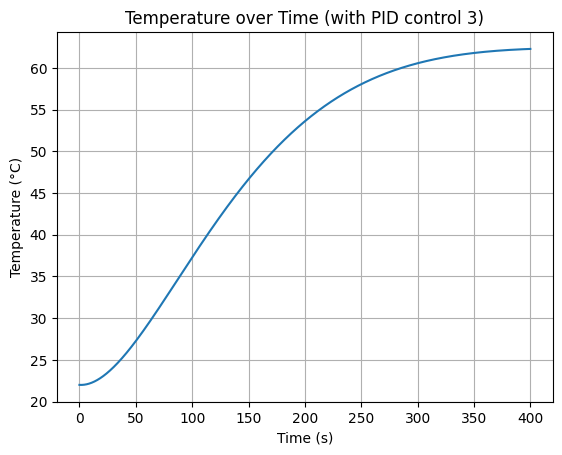

In [6]:
#PID attempt 1

import numpy as np
import matplotlib.pyplot as plt

# Define the PID controller parameters
Kp = 0.01  # Decreased from 0.02
Ki = 0.002  # Decreased from 0.005
Kd = 0.03  # Increased from 0.02

# Define the setpoint temperature
setpoint = 62

# Define the initial temperature and error
T0 = 22
error0 = setpoint - T0

# Define the time step and simulation time
delta_t = 0.1
simulation_time = 400

# Define the system parameters
k = 185
rho = 1700
C_plaque = 700
h = 35
A = (4e-3*60e-3)+(4e-3*35e-3)+(70e-3*60e-3)+(4e-3*60e-3)+(4e-3*20e-3)+(40e-3*60e-3)
V = ((60e-3 * 35e-3 * 2e-3)+(60e-3 * 20e-3 * 4e-3)+(60e-3 * 15e-3 * 2e-3))
T_air = 20
P = 10

# Initialize the simulation variables
num_iterations = int(simulation_time / delta_t)
T = np.zeros(num_iterations)
T[0] = T0
error = np.zeros(num_iterations)
error[0] = error0
integral = 0
derivative_error = np.zeros(num_iterations)

# Run the simulation with PID control
for i in range(num_iterations - 1):
    # Compute the error and update the integral and derivative terms
    error[i + 1] = setpoint - T[i]
    integral += error[i] * delta_t
    if i > 0:
        derivative_error[i] = (error[i] - error[i - 1]) / delta_t
    
    # Compute the control signal using the PID formula
    control_signal = Kp * error[i + 1] + Ki * integral + Kd * derivative_error[i]
    
    # Compute the temperature change using the heat equation
    delta = (control_signal - A * h * (T[i] - T_air)) * delta_t / (rho * C_plaque * V)
    T[i + 1] = T[i] + delta

# Plot the temperature data and the simulation results
time_simulation = np.linspace(0, simulation_time, num_iterations)
plt.plot(time_simulation, T, label='Simulation')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature over Time (with PID control 3)')
plt.grid(True)
plt.show()

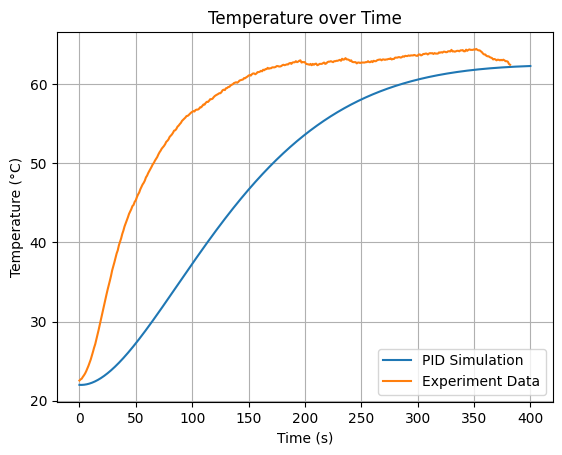

In [7]:
#Superposition de l'expérience et de la simulation avec PID

# Run the simulation with the last PI control parameters
Kp = 0.05
Ki = 0.01
T_PI = np.zeros(num_iterations)  # Initialize a new temperature array for the PI controller
T_PI[0] = T0

for i in range(num_iterations - 1):
    # Compute the error and update the integral term
    error[i + 1] = setpoint - T_PI[i]
    integral += error[i] * delta_t
    
    # Compute the control signal using the PI formula
    control_signal = Kp * error[i + 1] + Ki * integral
    
    # Compute the temperature change using the heat equation
    delta = (control_signal - A * h * (T_PI[i] - T_air)) * delta_t / (rho * C_plaque * V)
    T_PI[i + 1] = T_PI[i] + delta

# Extract the temperature data from the experiment data
lines = [line.strip() for line in data.split('\n')]
temperatures = [float(line.split()[1]) for line in lines if line.startswith('Temperature')]

# Create a time array assuming that each measurement was taken at equal intervals
time_experiment = np.arange(len(temperatures))

# Plot the temperature data, the PI simulation results, and the PID simulation results
plt.plot(time_simulation, T, label='PID Simulation')
#plt.plot(time_simulation, T_PI, label='PI Simulation')
plt.plot(time_experiment, temperatures, label='Experiment Data')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature over Time')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
#Modification avec curseurs des parametre du PID

import numpy as np
from ipywidgets import interact, widgets
import matplotlib.pyplot as plt

def simulate_system(Kp, Ki, Kd, setpoint, T0, k, rho, C_plaque, h, A, V, T_air, P, delta_t, simulation_time):
    
    error0 = setpoint - T0
    # Initialize the simulation variables
    num_iterations = int(simulation_time / delta_t)
    T = np.zeros(num_iterations)
    T[0] = T0
    error = np.zeros(num_iterations)
    error[0] = error0
    integral = 0
    derivative_error = np.zeros(num_iterations)

    # Run the simulation with PID control
    for i in range(num_iterations - 1):
        # Compute the error and update the integral and derivative terms
        error[i + 1] = setpoint - T[i]
        integral += error[i] * delta_t
        if i > 0:
            derivative_error[i] = (error[i] - error[i - 1]) / delta_t

        # Compute the control signal using the PID formula
        control_signal = Kp * error[i + 1] + Ki * integral + Kd * derivative_error[i]

        # Compute the temperature change using the heat equation
        delta = (control_signal - A * h * (T[i] - T_air)) * delta_t / (rho * C_plaque * V)
        T[i + 1] = T[i] + delta

    return T

def plot_simulation(Kp, Ki, Kd, setpoint, T0, k, rho, C_plaque, h, A, V, T_air, P, delta_t, simulation_time):
    temperatures = simulate_system(Kp, Ki, Kd, setpoint, T0, k, rho, C_plaque, h, A, V, T_air, P, delta_t, simulation_time)
    time = np.linspace(0, simulation_time, int(simulation_time / delta_t))

    plt.figure(figsize=(10, 4))
    # Plot the temperature data, the PI simulation results, and the PID simulation results
    plt.plot(time, temperatures, label='PID Simulation')
    plt.xlabel('Time (s)')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature over Time')
    plt.legend()
    plt.grid(True)
    plt.show()


# Define the sliders for each parameter
Kp_slider = widgets.FloatSlider(min=0, max=0.05, step=0.01, value=0.01)
Ki_slider = widgets.FloatSlider(min=0, max=0.005, step=0.001, value=0.002)
Kd_slider = widgets.FloatSlider(min=0, max=0.05, step=0.01, value=0.03)
setpoint_slider = widgets.FloatSlider(min=0, max=100, step=1, value=62)
T0_slider = widgets.FloatSlider(min=0, max=30, step=1, value=22)
k_slider = widgets.IntSlider(min=150, max=250, step=1, value=185)
rho_slider = widgets.IntSlider(min=1000, max=3000, step=100, value=1700)
C_plaque_slider = widgets.IntSlider(min=500, max=1000, step=50, value=700)
h_slider = widgets.IntSlider(min=5, max=50, step=1, value=35)
A_slider = widgets.FloatSlider(min=0.001, max=0.03, step=0.001, value=0.0073)
V_slider = widgets.FloatSlider(min=1e-6, max=1e-4, step=1e-6, value=1.08e-05)
T_air_slider = widgets.IntSlider(min=10, max=30, step=1, value=20)
P_slider = widgets.IntSlider(min=0, max=20, step=1, value=10)
delta_t_slider = widgets.FloatSlider(min=0.01, max=1, step=0.01, value=0.1)
simulation_time_slider = widgets.IntSlider(min=100, max=500, step=10, value=400)

# Create the interactive plot
interact(plot_simulation, 
         Kp=Kp_slider,
         Ki=Ki_slider,
         Kd=Kd_slider,
         setpoint=setpoint_slider,
         T0=T0_slider,
         k=k_slider,
         rho=rho_slider,
         C_plaque=C_plaque_slider,
         h=h_slider,
         A=A_slider,
         V=V_slider,
         T_air=T_air_slider,
         P=P_slider,
         delta_t=delta_t_slider,
         simulation_time=simulation_time_slider)


ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:
#Superposition de l'expérience et de la simulation avec PID et curseurs

import numpy as np
from ipywidgets import interact, widgets
import matplotlib.pyplot as plt

control_signal_list = []

def simulate_system(Kp, Ki, Kd, setpoint, T0, k, rho, C_plaque, h, A, V, T_air, P, delta_t, simulation_time):
    
    error0 = setpoint - T0
    # Initialize the simulation variables
    num_iterations = int(simulation_time / delta_t)
    T = np.zeros(num_iterations)
    T[0] = T0
    error = np.zeros(num_iterations)
    error[0] = error0
    integral = 0
    derivative_error = np.zeros(num_iterations)

    # Run the simulation with PID control
    for i in range(num_iterations - 1):
        # Compute the error and update the integral and derivative terms
        error[i + 1] = setpoint - T[i]
        integral += error[i] * delta_t
        if i > 0:
            derivative_error[i] = (error[i] - error[i - 1]) / delta_t

        # Compute the control signal using the PID formula
        control_signal = Kp * error[i + 1] + Ki * integral + Kd * derivative_error[i]
        control_signal_list.append(control_signal)

        # Compute the temperature change using the heat equation
        delta = (control_signal - A * h * (T[i] - T_air)) * delta_t / (rho * C_plaque * V)
        T[i + 1] = T[i] + delta

    return T

def plot_simulation(Kp, Ki, Kd, setpoint, T0, k, rho, C_plaque, h, A, V, T_air, P, delta_t, simulation_time):
    T = simulate_system(Kp, Ki, Kd, setpoint, T0, k, rho, C_plaque, h, A, V, T_air, P, delta_t, simulation_time)
    time = np.linspace(0, simulation_time, int(simulation_time / delta_t))

    plt.figure(figsize=(10, 4))
    plt.plot(time, T, label='PID Simulation')
    plt.plot(time_experiment, temperatures, label='Experiment Data')
    plt.xlabel('Time (s)')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature over Time')
    plt.legend()
    plt.grid(True)
    plt.show()


# Define the sliders for each parameter
Kp_slider = widgets.FloatSlider(min=0, max=0.05, step=0.01, value=0.01)
Ki_slider = widgets.FloatSlider(min=0, max=0.005, step=0.001, value=0.002)
Kd_slider = widgets.FloatSlider(min=0, max=0.05, step=0.01, value=0.03)
setpoint_slider = widgets.FloatSlider(min=0, max=100, step=1, value=63)
T0_slider = widgets.FloatSlider(min=0, max=30, step=1, value=22)
k_slider = widgets.IntSlider(min=150, max=250, step=1, value=185)
rho_slider = widgets.IntSlider(min=1000, max=3000, step=100, value=1300)
C_plaque_slider = widgets.IntSlider(min=300, max=1000, step=50, value=700)
h_slider = widgets.IntSlider(min=5, max=50, step=1, value=30)
A_slider = widgets.FloatSlider(min=0.001, max=0.03, step=0.001, value=0.0046)
V_slider = widgets.FloatSlider(min=1e-6, max=1e-4, step=1e-6, value=3.0e-06)
T_air_slider = widgets.IntSlider(min=10, max=40, step=1, value=30)
P_slider = widgets.IntSlider(min=0, max=20, step=1, value=10)
delta_t_slider = widgets.FloatSlider(min=0.01, max=1, step=0.01, value=0.1)
simulation_time_slider = widgets.IntSlider(min=100, max=500, step=10, value=400)

# Create the interactive plot
interact(plot_simulation, 
         Kp=Kp_slider,
         Ki=Ki_slider,
         Kd=Kd_slider,
         setpoint=setpoint_slider,
         T0=T0_slider,
         k=k_slider,
         rho=rho_slider,
         C_plaque=C_plaque_slider,
         h=h_slider,
         A=A_slider,
         V=V_slider,
         T_air=T_air_slider,
         P=P_slider,
         delta_t=delta_t_slider,
         simulation_time=simulation_time_slider)


In [ ]:
#Affichage de la puissance de chauffe asservie avec le PID

contole_signal_time = np.linspace(0, simulation_time, len(control_signal_list))

plt.figure(figsize=(10, 4))
plt.plot(contole_signal_time, control_signal_list, label='Control Signal')
plt.xlabel('Time (s)')
plt.ylabel('Control Signal')
plt.title('Control Signal over Time (W)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Série de mesure 2 avec refroidissement naturel

# 1) Récupérer les données du fichier et les stocker dans une variable
mesures = open("mesures2.txt", "r")
mesures = mesures.read()
mesures = mesures.split("\n")
mesures = mesures[1:-1]
mesures = [mesure.split(",") for mesure in mesures]
mesures = [[float(mesure[0]), float(mesure[1]), float(mesure[3])] for mesure in mesures]

# 2) Afficher la courbe
temps = [mesure[0] for mesure in mesures]
temperature = [mesure[1] for mesure in mesures]
plt.figure(figsize=(12, 6))  # Set the figure size to make it wider
plt.plot(temps, temperature)
plt.xlabel('Temps (s)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature en fonction du temps')
plt.xlim(0, 150)  # Set the x-axis limit to 150 seconds
plt.grid(True)
plt.show()

In [ ]:
#Superposition de la courbe déja créé de simulation de température sans PI et de la courbe de mesure 2

# Plot the temperature data and the simulation results
plt.plot(temps, temperature, label='Data')
plt.plot(time_simulation, T, label='Simulation')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature over Time')
plt.grid(True)
plt.legend()
#plt.xlim(0, 150)  # Set the x-axis limit to 150 seconds
plt.show()

In [ ]:
#Superposition de la première courbe de simulation avec des curseurs sur ses paramètres sans coupure de puissance

import numpy as np
from ipywidgets import interact, widgets
import matplotlib.pyplot as plt

def simulate_system(T0, k, rho, C_plaque, h, A, V, T_air, P, delta_t, simulation_time):
    
    # Initialize the simulation variables
    num_iterations = int(simulation_time / delta_t)
    T = np.zeros(num_iterations)
    T[0] = T0

    # Run the simulation
    for i in range(num_iterations - 1):
        # Compute the temperature change using the heat equation
        delta = -k * (T[i] - T_air) * A * delta_t / (rho * C_plaque * V) + P * delta_t / (rho * C_plaque * V)
        T[i + 1] = T[i] + delta

    return T

def plot_simulation(T0, k, rho, C_plaque, h, A, V, T_air, P, delta_t, simulation_time):
    T = simulate_system(T0, k, rho, C_plaque, h, A, V, T_air, P, delta_t, simulation_time)
    time = np.linspace(0, simulation_time, int(simulation_time / delta_t))

    plt.figure(figsize=(10, 4))
    plt.plot(time, T, label='Simulation')
    plt.plot(temps, temperature, label='mesures2')
    plt.xlabel('Time (s)')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature over Time')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 200)
    plt.show()
    print("variable A = ",A, " ; variable V = ", V)

# Define the sliders for each parameter
T0_slider = widgets.FloatSlider(min=0, max=30, step=1, value=20)
k_slider = widgets.IntSlider(min=100, max=400, step=1, value=127)
rho_slider = widgets.IntSlider(min=500, max=4000, step=100, value=1200)
C_plaque_slider = widgets.IntSlider(min=200, max=2000, step=50, value=450)
h_slider = widgets.IntSlider(min=1, max=100, step=1, value=35)
A_slider = widgets.FloatSlider(min=0.0001, max=0.05, step=0.0001, value=0.0022)
V_slider = widgets.FloatSlider(min=1e-7, max=1e-3, step=1e-7, value=3.0e-06)
T_air_slider = widgets.IntSlider(min=10, max=40, step=1, value=25)
P_slider = widgets.IntSlider(min=0, max=30, step=1, value=11)
delta_t_slider = widgets.FloatSlider(min=0.01, max=1, step=0.01, value=0.1)
simulation_time_slider = widgets.IntSlider(min=100, max=500, step=10, value=400)

# Create the interactive plot
interact(plot_simulation, 
         T0=T0_slider,
         k=k_slider,
         rho=rho_slider,
         C_plaque=C_plaque_slider,
         h=h_slider,
         A=A_slider,
         V=V_slider,
         T_air=T_air_slider,
         P=P_slider,
         delta_t=delta_t_slider,
         simulation_time=simulation_time_slider)


•Identifier expérimentalement la valeur numérique des paramètres thermiques du système.

In [ ]:
#Superposition de la première courbe de simulation avec des curseurs sur ses paramètres AVEC coupure de puissance 

import numpy as np
from ipywidgets import interact, widgets
import matplotlib.pyplot as plt

def simulate_system(T0, k, rho, C_plaque, h, A, V, T_air, P, delta_t, simulation_time):
    
    # Initialize the simulation variables
    num_iterations = int(simulation_time / delta_t)
    T = np.zeros(num_iterations)
    T[0] = T0

    # Run the simulation
    for i in range(num_iterations - 1):
        # Compute the temperature change using the heat equation
        if i * delta_t >= 29:
            P = 0  # Set P to 0 after 30 seconds
        delta = -k * (T[i] - T_air) * A * delta_t / (rho * C_plaque * V) + P * delta_t / (rho * C_plaque * V)
        T[i + 1] = T[i] + delta

    return T

def plot_simulation(T0, k, rho, C_plaque, h, A, V, T_air, P, delta_t, simulation_time):
    T = simulate_system(T0, k, rho, C_plaque, h, A, V, T_air, P, delta_t, simulation_time)
    time = np.linspace(0, simulation_time, int(simulation_time / delta_t))

    plt.figure(figsize=(10, 4))
    plt.plot(time, T, label='Simulation')
    plt.plot(temps, temperature, label='mesures2')
    plt.xlabel('Time (s)')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature over Time')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 200)
    plt.show()
    print("variable A = ",A, " ; variable V = ", V)

# Define the sliders for each parameter
T0_slider = widgets.FloatSlider(min=0, max=29, step=1, value=20)
k_slider = widgets.IntSlider(min=50, max=200, step=1, value=85)
rho_slider = widgets.IntSlider(min=500, max=4000, step=100, value=1600)
C_plaque_slider = widgets.IntSlider(min=200, max=2000, step=50, value=450)
h_slider = widgets.IntSlider(min=1, max=100, step=1, value=35)
A_slider = widgets.FloatSlider(min=0.0001, max=0.005, step=0.0001, value=0.0013)
V_slider = widgets.FloatSlider(min=1e-7, max=1e-5, step=1e-7, value=5.7e-06)
T_air_slider = widgets.IntSlider(min=10, max=40, step=1, value=19)
P_slider = widgets.IntSlider(min=0, max=30, step=1, value=9)
delta_t_slider = widgets.FloatSlider(min=0.01, max=1, step=0.01, value=0.1)
simulation_time_slider = widgets.IntSlider(min=100, max=500, step=10, value=400)

# Create the interactive plot
interact(plot_simulation, 
         T0=T0_slider,
         k=k_slider,
         rho=rho_slider,
         C_plaque=C_plaque_slider,
         h=h_slider,
         A=A_slider,
         V=V_slider,
         T_air=T_air_slider,
         P=P_slider,
         delta_t=delta_t_slider,
         simulation_time=simulation_time_slider)


• Superposer les résultats théoriques et expérimentaux. 

-> Comparaison boucle ouverte et boucle fermée ...

In [ ]:
#Simulation + PI avec curseurs, coupure de puissance

control_signal_list = []

def simulate_system(T0, k, rho, C_plaque, h, A, V, T_air, P, delta_t, simulation_time, Kp, Ki, setpoint):
    
    # Initialize the simulation variables
    num_iterations = int(simulation_time / delta_t)
    T = np.zeros(num_iterations)
    T[0] = T0
    error = np.zeros(num_iterations)
    integral = 0
    derivative_error = np.zeros(num_iterations)

    # Run the simulation with PID control
    for i in range(num_iterations - 1):
        # Compute the temperature change using the heat equation
        if i * delta_t >= 29:
            P = 0  # Set P to 0 after 30 seconds
        delta = -k * (T[i] - T_air) * A * delta_t / (rho * C_plaque * V) + P * delta_t / (rho * C_plaque * V)
        #delta = (P - A * h * (T[i] - T_air)) * delta_t / (rho * C_plaque * V) eq du début ------------------------------------------------------------------------------------------------------------------------
        T[i + 1] = T[i] + delta

        # Compute the error and update the integral and derivative terms
        error[i + 1] = setpoint - T[i + 1]
        integral += error[i + 1] * delta_t
        if i > 0:
            derivative_error[i] = (error[i + 1] - error[i]) / delta_t

        # Compute the control signal using the PID formula
        control_signal = Kp * error[i + 1] + Ki * integral
        P = control_signal
        control_signal_list.append(control_signal)

    return T

def plot_simulation(T0, k, rho, C_plaque, h, A, V, T_air, P, delta_t, simulation_time, Kp, Ki, setpoint):
    T = simulate_system(T0, k, rho, C_plaque, h, A, V, T_air, P, delta_t, simulation_time, Kp, Ki, setpoint)
    time = np.linspace(0, simulation_time, int(simulation_time / delta_t))

    plt.figure(figsize=(10, 4))
    plt.plot(time, T, label='Simulation')
    plt.plot(temps, temperature, label='mesures2')
    plt.xlabel('Time (s)')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature over Time')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 200)
    plt.show()
    print("variable A = ",A, " ; variable V = ", V, " ; variable Kp = ", Kp, " ; variable Ki = ", Ki)

# Define the sliders for each parameter
T0_slider = widgets.FloatSlider(min=0, max=29, step=1, value=20)
k_slider = widgets.IntSlider(min=50, max=200, step=1, value=85)
rho_slider = widgets.IntSlider(min=500, max=4000, step=100, value=1600)
C_plaque_slider = widgets.IntSlider(min=200, max=2000, step=50, value=450)
h_slider = widgets.IntSlider(min=1, max=100, step=1, value=35)
A_slider = widgets.FloatSlider(min=0.0001, max=0.005, step=0.0001, value=0.0013)
V_slider = widgets.FloatSlider(min=1e-7, max=1e-5, step=1e-7, value=5.7e-06)
T_air_slider = widgets.IntSlider(min=10, max=40, step=1, value=19)
P_slider = widgets.IntSlider(min=0, max=30, step=1, value=9)
delta_t_slider = widgets.FloatSlider(min=0.01, max=1, step=0.01, value=0.1)
simulation_time_slider = widgets.IntSlider(min=100, max=500, step=10, value=400)
Kp_slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.69)
Ki_slider = widgets.FloatSlider(min=0, max=0.05, step=0.001, value=0.025)
setpoint_slider = widgets.FloatSlider(min=0, max=100, step=1, value=63)

# Create the interactive plot
interact(plot_simulation, 
         T0=T0_slider,
         k=k_slider,
         rho=rho_slider,
         C_plaque=C_plaque_slider,
         h=h_slider,
         A=A_slider,
         V=V_slider,
         T_air=T_air_slider,
         P=P_slider,
         delta_t=delta_t_slider,
         simulation_time=simulation_time_slider,
         Kp=Kp_slider,
         Ki=Ki_slider,
         setpoint=setpoint_slider)


In [ ]:
#Affichage de la puissance de chauffe asservie avec le PI

contole_signal_time = np.linspace(0, simulation_time, len(control_signal_list))

#je veux que les valeurs de control_signal_list de 30 à 400 soient égales à 0
#for i in range(30, len(control_signal_list)):
#    control_signal_list[i] = 0


plt.figure(figsize=(10, 4))
plt.plot(contole_signal_time, control_signal_list, label='Control Signal')
plt.xlabel('Time (s)')
plt.ylabel('Control Signal (W)')
plt.title('Control Signal over Time')
plt.legend()
plt.grid(True)
#plt.xlim(0, 30)
#plt.ylim(0, 150)
plt.show()

In [ ]:
#Affichage de la puissance de chauffe asservie avec le PI centré et tronqué

contole_signal_time = np.linspace(0, simulation_time, len(control_signal_list))

for i in range(1500, len(control_signal_list)):
    control_signal_list[i] = 0


plt.figure(figsize=(10, 4))
plt.plot(contole_signal_time, control_signal_list, label='Control Signal')
plt.xlabel('Time (s)')
plt.ylabel('Control Signal (W)')
plt.title('Control Signal over Time TRONQUE')
plt.legend()
plt.grid(True)
plt.xlim(0, 50)
plt.ylim(0, 150)
plt.show()

COMPARAISON

Valeurs de la simu :                                                                        Valeurs du net/calcuulée:
k=85                    Conductivité thermique de l'acier en W/(m·K)                        50
rho=1600                Densité de l'acier en kg/m^3                                        7800
C_plaque=450            Capacité calorifique spécifique de l'acier en J/(kg·K)              502
h=35                    Coefficient de convection W/m²K                                     5-25                         flux d'air forcé : 10 à 100 W/m²K ; flux naturel : 5 à 25 W/m²K
A=0.0013                Air du système en chauffe eb m2                                     (4e-3*60e-3)+(4e-3*35e-3)+(70e-3*60e-3)+(4e-3*60e-3)+(4e-3*20e-3)+(40e-3*60e-3) = 0.0073
V=5.7e-06               Volume du sytème en chauffe en m3                                   ((60e-3 * 35e-3 * 2e-3)+(60e-3 * 20e-3 * 4e-3)+(60e-3 * 15e-3 * 2e-3)) = 1.08e-05
T_air=19                Température de l'air en degrés                                      20
P=9                     Puissance de chauffe en watt                                        10

TODO:
                   1) essayer d'afficher ma simulation avec P qui vient de l'expériementation, une liste de donnée en gros (en attente du fichier expérimentale)
                   3) demander de faire exp avec eq/correcteur PI ou bien la courbe de puissance que j'ai obtenue (demander demander au groupe de le faire)
                   4) mesure 2 + simu sans PI avec nouvelles constantes 
                   5) supperposée simu brut à jour avec la meme mais avec ventillo (n°4 requis)


In [ ]:
#Simu brut avec constante ajustée : comparaison avec et sans ventillation

#Je veux afficher cette courbe, donc garder ce code tel qu'il est, mais je veut la superposée sur le meme plot avec une autre courbe. Cette autre courbe est la meme, tous les parametre sont identiques sauf h, je veux qu'il s'appelle h2 et je veux un curseur qui lui est dédié

def simulate_system(T0, k, rho, C_plaque, h, A, V, T_air, P, delta_t, simulation_time):
    
    # Initialize the simulation variables
    num_iterations = int(simulation_time / delta_t)
    T = np.zeros(num_iterations)
    T[0] = T0

    # Run the simulation
    for i in range(num_iterations - 1):
        # Compute the temperature change using the heat equation
        if i * delta_t >= 29:
            P = 0  # Set P to 0 after 30 seconds
        delta = -k * (T[i] - T_air) * A * delta_t / (rho * C_plaque * V) + P * delta_t / (rho * C_plaque * V)
        T[i + 1] = T[i] + delta

    return T

def plot_simulation(T0, k, rho, C_plaque, h, A, V, T_air, P, delta_t, simulation_time):
    T = simulate_system(T0, k, rho, C_plaque, h, A, V, T_air, P, delta_t, simulation_time)
    time = np.linspace(0, simulation_time, int(simulation_time / delta_t))

    plt.figure(figsize=(10, 4))
    plt.plot(time, T, label='Simulation')
    #plt.plot(temps, temperature, label='mesures2')
    plt.xlabel('Time (s)')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature over Time')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 200)
    plt.show()
    print("variable A = ",A, " ; variable V = ", V)

# Define the sliders for each parameter
T0_slider = widgets.FloatSlider(min=0, max=29, step=1, value=20)
k_slider = widgets.IntSlider(min=50, max=200, step=1, value=85)
rho_slider = widgets.IntSlider(min=500, max=4000, step=100, value=1600)
C_plaque_slider = widgets.IntSlider(min=200, max=2000, step=50, value=450)
h_slider = widgets.IntSlider(min=1, max=100, step=1, value=35)
A_slider = widgets.FloatSlider(min=0.0001, max=0.005, step=0.0001, value=0.0013)
V_slider = widgets.FloatSlider(min=1e-7, max=1e-5, step=1e-7, value=5.7e-06)
T_air_slider = widgets.IntSlider(min=10, max=40, step=1, value=19)
P_slider = widgets.IntSlider(min=0, max=30, step=1, value=9)
delta_t_slider = widgets.FloatSlider(min=0.01, max=1, step=0.01, value=0.1)
simulation_time_slider = widgets.IntSlider(min=100, max=500, step=10, value=400)

# Create the interactive plot
interact(plot_simulation, 
         T0=T0_slider,
         k=k_slider,
         rho=rho_slider,
         C_plaque=C_plaque_slider,
         h=h_slider,
         A=A_slider,
         V=V_slider,
         T_air=T_air_slider,
         P=P_slider,
         delta_t=delta_t_slider,
         simulation_time=simulation_time_slider)


• Étudier l’influence de la convection forcé en ajoutant un ventilateur de PC (qui pourrait être commandé par votre système numérique)

In [ ]:
# Mesure 3 (indisponible pour le moment) + simulation brut sans ventillo + simulation brut avec ventillo. 
#(On considère une ventillation constante dans un premier temps, on peut essayer de la faire varier cette ventillation par la suite pour mettre à l'épreuve notre système et tester sa réactivité/fiabilité))

